In [46]:
import numpy as np
import pandas as pd

In [47]:
telco = pd.read_csv(
    "../dataset/Telco-Customer-Churn.csv",
    index_col="customerID",
    converters={
        "Partner": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "Dependents": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "PhoneService": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "MultipleLines": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "OnlineSecurity": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "OnlineBackup": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "DeviceProtection": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "TechSupport": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "StreamingTV": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "StreamingMovies": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "PaperlessBilling": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
        "Churn": lambda x: np.byte(1) if x == "Yes" else np.byte(0),
    },
)
telco.drop_duplicates(inplace=True)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int8   
 3   Dependents        7021 non-null   int8   
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int8   
 6   MultipleLines     7021 non-null   int8   
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   int8   
 9   OnlineBackup      7021 non-null   int8   
 10  DeviceProtection  7021 non-null   int8   
 11  TechSupport       7021 non-null   int8   
 12  StreamingTV       7021 non-null   int8   
 13  StreamingMovies   7021 non-null   int8   
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   int8   
 16  PaymentMethod     7021 non-null 

In [58]:
telco["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

### Data Cleaning

In [48]:
telco.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,0.484546,0.300527,32.469449,0.902863,0.423159,0.287566,0.345962,0.344965,0.291127,0.385558,0.389118,0.592651,64.851894,0.264492
std,0.368947,0.499797,0.458520,24.534965,0.296166,0.494095,0.452660,0.475715,0.475391,0.454314,0.486761,0.487585,0.491376,30.069001,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.400000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000


In [49]:
telco.corr(numeric_only=True)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.015553,-0.212115,0.015349,0.008909,0.142357,-0.039332,0.065950,0.058797,-0.061338,0.104765,0.119584,0.156196,0.219434,0.151619
Partner,0.015553,1.000000,0.451659,0.377346,0.018728,0.139834,0.141482,0.139620,0.151941,0.118311,0.122572,0.115284,-0.015776,0.094301,-0.149135
Dependents,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.026324,0.079776,0.022217,0.012498,0.062039,-0.018207,-0.041441,-0.112220,-0.116191,-0.163459
tenure,0.015349,0.377346,0.157603,1.000000,0.009786,0.329742,0.325704,0.358586,0.358968,0.322694,0.277575,0.283932,0.005053,0.245251,-0.351508
PhoneService,0.008909,0.018728,-0.001092,0.009786,1.000000,0.280935,-0.092316,-0.051619,-0.070554,-0.095761,-0.021788,-0.032179,0.016824,0.248984,0.011323
MultipleLines,0.142357,0.139834,-0.026324,0.329742,0.280935,1.000000,0.096583,0.200690,0.199591,0.099037,0.255579,0.257170,0.163249,0.489539,0.041958
OnlineSecurity,-0.039332,0.141482,0.079776,0.325704,-0.092316,0.096583,1.000000,0.282802,0.274398,0.354110,0.174919,0.186119,-0.004202,0.295548,-0.170520
OnlineBackup,0.065950,0.139620,0.022217,0.358586,-0.051619,0.200690,0.282802,1.000000,0.302398,0.293209,0.280816,0.273188,0.126421,0.440965,-0.081092
DeviceProtection,0.058797,0.151941,0.012498,0.358968,-0.070554,0.199591,0.274398,0.302398,1.000000,0.332348,0.389783,0.401032,0.103425,0.482007,-0.064944
TechSupport,-0.061338,0.118311,0.062039,0.322694,-0.095761,0.099037,0.354110,0.293209,0.332348,1.000000,0.276935,0.278218,0.037407,0.337366,-0.163937


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

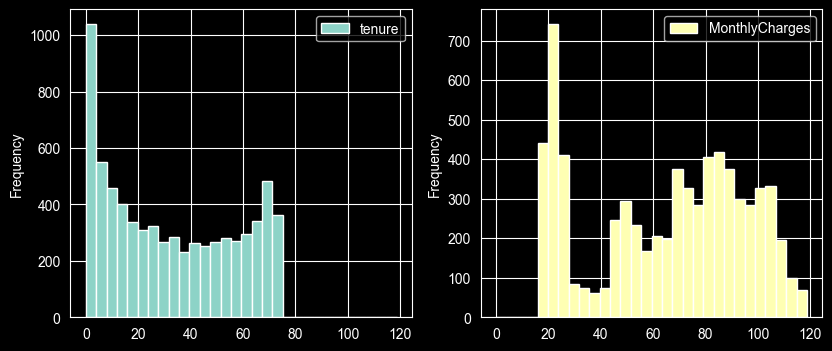

In [53]:
telco[["tenure", "MonthlyCharges"]].plot(kind="hist", bins=30, subplots=True, layout=(1, 3), figsize=(15, 4))

tenure               Axes(0.125,0.11;0.227941x0.77)
MonthlyCharges    Axes(0.398529,0.11;0.227941x0.77)
dtype: object

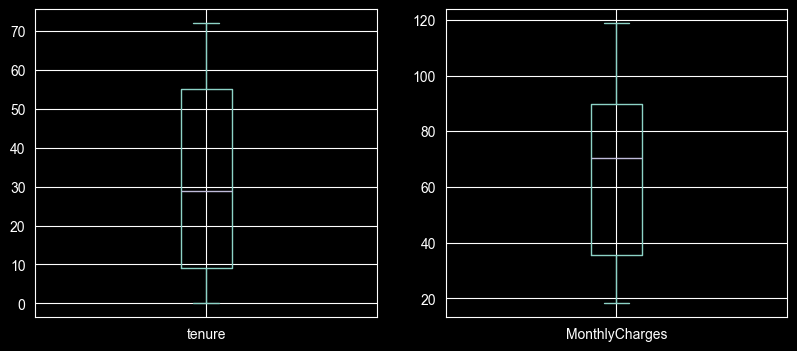

In [52]:
telco[["tenure", "MonthlyCharges"]].plot(kind="box", subplots=True, layout=(1, 3), figsize=(15, 4))

In [60]:
telco.select_dtypes(np.int8).columns

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'],
      dtype='object')

In [65]:
telco["Churn"].value_counts() / len(telco)

Churn
0    0.735508
1    0.264492
Name: count, dtype: float64